# Vectorfitting

This is a from scratch pure python implementation of the fast relaxed vectorfitting algorithm for MIMO frequency domain data. Different modes (standard VF, relaxed VF and fast relaxed VF) are implemented. Matrix shaped frequency domain data is supported, and a model with common poles is fitted

$$ \mathbf{H}_{fit}(s) = \mathbf{D} + s \cdot \mathbf{E} + \sum_{k=1}^{n} \mathbf{R}_{k} \cdot \frac{1}{s - p_k} $$

where $\mathbf{D}$ is the constant term, $\mathbf{E}$ is the linear term and $\mathbf{R}_{k}$, $p_k$ are the (possibly complex) residues in matrix form and poles. 

## Example

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from vectorfitting import VecFit
from transferfunction import H_rng

In [138]:
#create random test data
Freq = np.linspace(0, 1000, 500)
H    = H_rng(shape=(2, 2), n_cpx=8, n_real=2, f_min=0, f_max=1000).evaluate(Freq)


In [139]:
#initialize vectorfitting engine
VF = VecFit(H, Freq, n_cpx=8, n_real=2, mode="fast_relax", smart=False, autoreduce=False, fit_Const=True, fit_Diff=True)

#run fitting procedure
VF.fit(tol=1e-3, max_steps=10, debug=True)

err_max  = 24.883894256523874
err_mean = 0.3428508773759597
err_max  = 0.8227166843606949
err_mean = 0.01613016648118819
err_max  = 0.035637788529631446
err_mean = 0.0004303714534570589
err_max  = 0.011308593212714687
err_mean = 0.0001807675245656599
err_max  = 0.010692738692936835
err_mean = 0.0001706242431973156
err_max  = 0.010108229890912004
err_mean = 0.00016080139406440198
err_max  = 0.009534450881944195
err_mean = 0.00015120488651519933
err_max  = 0.008970789541962093
err_mean = 0.0001418343974664281
err_max  = 0.008417492617790985
err_mean = 0.00013269326592088131
err_max  = 0.007875072845379616
err_mean = 0.00012378837228301832
err_max  = 0.007344305882493963
err_mean = 0.00011513020260219449
n_real = 2
n_cpx  = 8


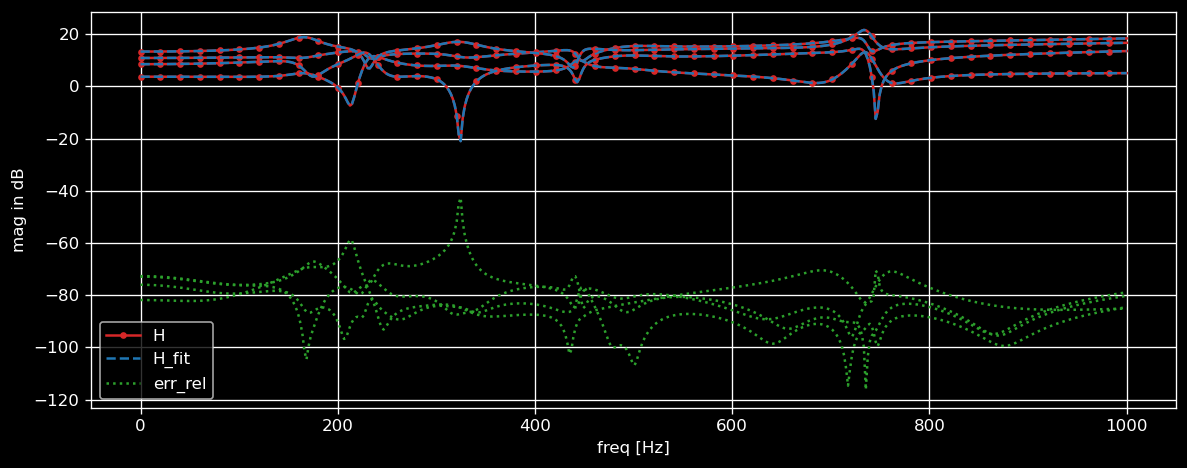

In [140]:
#evaluate fit
H_fit = VF.TF.evaluate(Freq)

#compute relative error
err_rel = (H - H_fit) / H

#dB helper
dB  = lambda x: 20*np.log10(abs(x))

#plot results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), tight_layout=True, dpi=120)

N, n, m = H.shape

for i in range(n):
    for j in range(m):
        ax.plot(Freq, dB(H[:,i,j]), ".-", markevery=10, color="tab:red", label="H" if i==j==0 else None)
        ax.plot(Freq, dB(H_fit[:,i,j]), "--", color="tab:blue", label="H_fit" if i==j==0 else None)
        ax.plot(Freq, dB(err_rel[:,i,j]), ":", color="tab:green", label="err_rel" if i==j==0 else None)
        

ax.set_xlabel("freq [Hz]")
ax.set_ylabel("mag in dB")
ax.grid(True)
ax.legend()

plt.savefig("test.svg")

## References

[1] Gustavsen, B. and Adam Semlyen. “Rational approximation of frequency domain responses by vector fitting.” IEEE Transactions on Power Delivery 14 (1999): 1052-1061.

[2] B. Gustavsen, "Improving the pole relocating properties of vector fitting," in IEEE Transactions on Power Delivery, vol. 21, no. 3, pp. 1587-1592, July 2006, doi: 10.1109/TPWRD.2005.860281.

[3] D. Deschrijver, M. Mrozowski, T. Dhaene and D. De Zutter, "Macromodeling of Multiport Systems Using a Fast Implementation of the Vector Fitting Method," in IEEE Microwave and Wireless Components Letters, vol. 18, no. 6, pp. 383-385, June 2008, doi: 10.1109/LMWC.2008.922585.

In [141]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --ClearOutput.enabled=True --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 3895 bytes to README.md
